## Cross Validation
### Carlos Marcelo Barrera Nolasco
### 101893

In [1]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

## Read file into dataframe

In [2]:
df = pd.read_csv("../../Recursos/regLinPoli2.csv") ##insert your own path

## Divide in train and test

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[[df.columns[-1]]], train_size=0.75)

### I recommend that after manipulating data using pandas and before modelling to convert dataframes into arrays. This may avoid some headaches

In [5]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

## Procedure for data standardizing

In [6]:
# This procedure is useful for classroom examples. For a real implementation you have to have a separete method 
# for transforming the production data so you can transform it as you get it with the fitted scaler
## The procedure returns a standardized copy of the input data
def normalize(X_train,X_test,Y_train,Y_test,do=True):

    scale_X=preprocessing.StandardScaler()
    scale_y=preprocessing.StandardScaler()
    
    train_X=np.copy(X_train)
    train_y=np.copy(Y_train)
    test_X=np.copy(X_test)
    test_y=np.copy(Y_test)
    if do:
        scale_X.fit(train_X)
        scale_y.fit(train_y)
        train_X=scale_X.transform(train_X)
        train_y=scale_y.transform(train_y)
        test_X=scale_X.transform(test_X)
        test_y=scale_y.transform(test_y)
    return train_X,test_X, train_y, test_y

## Incremental regularized regression procedures

In [7]:
## Transfer function
def salida(w,X):
    return X.dot(w[1:]) +w[0]


In [8]:
## Training function
def entrena(X,y,w,la=0.0,eta=0.01):
    
    for i in range(len(X)):
        error=y[i]-salida(w,X[i])
        w[0]=w[0]+eta*(error)
        w[1:]=w[1:]+eta*(error*X[i])-la*w[1:]
    return w


## Error function

In [9]:
def calcError(X,y,w,w0):
    return np.mean((X.dot(w)+w0-y)**2)

## Use

In [10]:
train_X,test_X,train_y,test_y=normalize(X_train,X_test,Y_train,Y_test)

In [11]:
w=np.asarray([rnd.random() for i in range(1+len(train_X[0]))])
for i in range(100):
    w=entrena(train_X,train_y,w,la=0.00)

In [12]:
## flatten here to convert y from a matrix to a vector. Only 1 response variable
print calcError(train_X,train_y.flatten(),w[1:],w[0])
print calcError(test_X,test_y.flatten(),w[1:],w[0])

0.49438011387
0.539496508292


In [13]:
def cross_val(X, Y, lbdas, k,iters):
    error_mean = []
    error_std = []
    w_arr = []
    w = np.random.rand(len(X[0])+1)*100
    for j in range (0, len(lbdas)):
        errors = []
        for i in range (k):
            framesize = int(np.floor(len(X)/ k))
            idx1 = i*framesize
            if(i!=k-1):
                idx2 = (i+1)*(framesize)
            else:
                idx2 = len(X)

            validation_x, validation_y = X[idx1:idx2], Y[idx1:idx2]
            train_aux_x_1, train_aux_y_1 = X[:idx1], Y[:idx1]
            train_aux_x_2, train_aux_y_2 = X[idx2:], Y[idx2:]
            train_aux_x = np.concatenate((train_aux_x_1, train_aux_x_2), axis=0)
            train_aux_y = np.concatenate((train_aux_y_1, train_aux_y_2), axis=0)

            x_train_n, x_test_n, y_train_n, y_test_n = normalize(train_aux_x, validation_x, train_aux_y, validation_y)
            
            for i in range(iters):
                w=entrena(x_train_n,y_train_n,w,la=lbdas[j])
            errors.append(calcError(x_test_n,y_test_n.flatten(),w[1:],w[0]))
        
        error_mean.append(np.mean(errors))
        error_std.append(np.std(errors))
    return error_mean, error_std

## Probando con $\lambda= 0, 0.001, 0.002 $

In [22]:
lambdas = [0, 0.001, 0.002]

In [23]:
error_mean, error_std = cross_val(X_train, Y_train, lambdas, 5, 10)

In [24]:
print error_mean
print error_std

[0.54399588722464409, 0.537677295761394, 0.54206710581395934]
[0.083084549327660864, 0.084816290017529369, 0.083293451711955249]


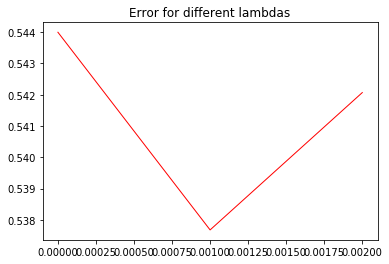

In [25]:
plt.plot(lambdas, error_mean, color='red', linewidth=1)
plt.title('Error for different lambdas')

## Probando con 100 valores de $\lambda$ distribuidos entre 0 y 0.01

In [18]:
lambdas = np.linspace(0, 0.01, 100, endpoint=False)

In [19]:
error_mean, error_std = cross_val(X_train, Y_train, lambdas, 5, 10)

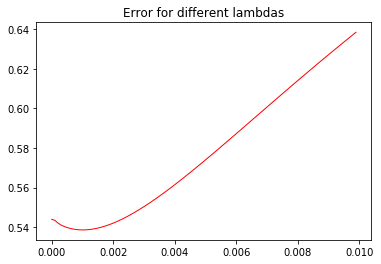

In [20]:
plt.plot(lambdas, error_mean, color='red', linewidth=1)
plt.title('Error for different lambdas')

In [21]:
print "Error mínimo: " + str(min(error_mean))
print "Lambda con error mínimo: " + str(lambdas[np.argmin(error_mean)])

Error mínimo: 0.538646723424
Lambda con error mínimo: 0.001
